# Digit Classification using Dense Neural Network (DNN) - Version 2 
 - Using validation and test data 

## ==> Verify on Runtime tab if GPU is active on Runtime type

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

Init Plugin
Init Graph Optimizer
Init Kernel


## Upload and Explore Dataset
[MNIST](http://yann.lecun.com/exdb/mnist/) handwritten digits dataset

The MNIST database of handwritten digits, is also available from this [TF page](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data), has a training set of 60,000 28x28 grayscale images of the 10 digits along a test set of 10,000 images. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.


In [2]:
data = tf.keras.datasets.mnist

(tt_images, tt_labels), (test_images, test_labels) = data.load_data()

In [3]:
print(tt_images.shape)
print(tt_labels.shape)

(60000, 28, 28)
(60000,)


In [4]:
print(test_images.shape)
print(test_labels.shape)

(10000, 28, 28)
(10000,)


In [5]:
tt_labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

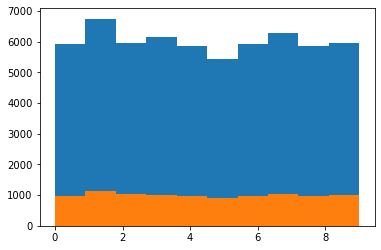

In [6]:
plt.hist(tt_labels);
plt.hist(test_labels);

In [7]:
val_images = tt_images[:10000]
val_labels = tt_labels[:10000]

In [8]:
train_images = tt_images[10000:]
train_labels = tt_labels[10000:]

In [9]:
print(train_images.shape)
print(train_labels.shape)

(50000, 28, 28)
(50000,)


In [10]:
print(val_images.shape)
print(val_labels.shape)

(10000, 28, 28)
(10000,)


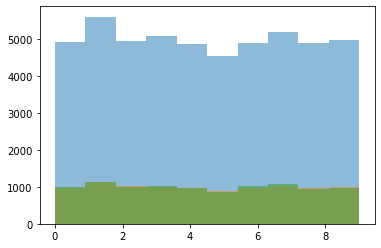

In [11]:
plt.hist(train_labels, alpha=0.5, label='Train')
plt.hist(test_labels, alpha=0.5, label='Val')
plt.hist(val_labels, alpha=0.5, label='Test');

     Label of image 1000 is: 9


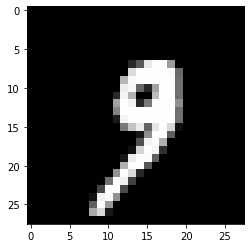

In [12]:
img = 1000
print("     Label of image {} is: {}".format(img, test_labels[img]))
plt.imshow(test_images[img], cmap='gray');

### Preprocessing Data 

**Normalizing Data**: 
We notice that all of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called 'normalizing'.

In [13]:
train_images  = train_images / 255.0
val_images = val_images / 255.0
test_images = test_images / 255.0

## Define and Compile Model

In [14]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(20, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.summary()

Metal device set to: Apple M1 Pro
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 20)                15700     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


2021-12-20 12:36:14.080477: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-12-20 12:36:14.081027: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [16]:
model = Sequential([Flatten(input_shape=(28,28)),
                    Dense(20, activation='relu'),
                    Dense(10, activation='softmax')])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


In [17]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
#model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                210       
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


In [18]:
def create_model():
  model = Sequential()
  model.add(Flatten(input_shape=(28,28)))
  model.add(Dense(20, activation='relu'))
  model.add(Dense(10, activation='softmax')) 
  return model 

In [19]:
model = create_model()

In [20]:
model.compile(
    optimizer='adam', # uses default learning_rate=0.001
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

In [21]:
from tensorflow.keras.optimizers import Adam, SGD

In [22]:
opt = Adam(learning_rate=0.01)
model.compile(
    optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

## Train the model

You could leave the training data with all samples, and alternativelly use: 
- `validation_split=0.1` instead of `validation_data=(val_images, val_labels)`.

In this case, TF will split the validation data by itself. 

In [23]:
history = model.fit(
    train_images, 
    train_labels, 
    epochs=20, 
    validation_data=(val_images, val_labels) 
    )

2021-12-20 12:36:14.615652: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-12-20 12:36:14.618001: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-12-20 12:36:14.724358: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/20
1563/1563 [==============================] - ETA: 0s - loss: 0.3398 - accuracy: 0.8974

2021-12-20 12:36:21.932284: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 8s 5ms/step - loss: 0.3398 - accuracy: 0.8974 - val_loss: 0.2457 - val_accuracy: 0.9282
Epoch 2/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.2388 - accuracy: 0.9303 - val_loss: 0.2324 - val_accuracy: 0.9350
Epoch 3/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.2178 - accuracy: 0.9373 - val_loss: 0.2226 - val_accuracy: 0.9366
Epoch 4/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.2066 - accuracy: 0.9407 - val_loss: 0.2208 - val_accuracy: 0.9377
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1951 - accuracy: 0.9423 - val_loss: 0.2059 - val_accuracy: 0.9422
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1892 - accuracy: 0.9440 - val_loss: 0.2147 - val_accuracy: 0.9388
Epoch 7/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1845 - accuracy: 0.9464 - val_loss: 0.2123 - val_accuracy: 0.9435
Epo

Inspecting the model

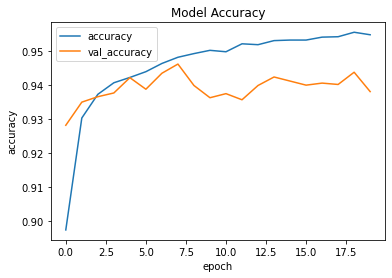

In [24]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

If validation accuracy seems “instable”, could be that Learning Rate is high (try to reduce it). 

Let's start over with a lower Lr (for exampe: 0.0001)

In [25]:
opt = Adam(learning_rate=0.0001)

model = create_model()
model.compile(
    optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

history = model.fit(
    train_images, 
    train_labels, 
    epochs=20, 
    validation_data=(val_images, val_labels) 
    )

Epoch 1/20
  35/1563 [..............................] - ETA: 6s - loss: 2.3516 - accuracy: 0.1536

2021-12-20 12:38:46.186906: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1562/1563 [============================>.] - ETA: 0s - loss: 1.2177 - accuracy: 0.6692

2021-12-20 12:38:53.292040: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 8s 5ms/step - loss: 1.2177 - accuracy: 0.6692 - val_loss: 0.6191 - val_accuracy: 0.8565
Epoch 2/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5025 - accuracy: 0.8763 - val_loss: 0.4137 - val_accuracy: 0.8925
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.3834 - accuracy: 0.8985 - val_loss: 0.3482 - val_accuracy: 0.9072
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.3346 - accuracy: 0.9085 - val_loss: 0.3152 - val_accuracy: 0.9143
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.3070 - accuracy: 0.9143 - val_loss: 0.2956 - val_accuracy: 0.9195
Epoch 6/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.2884 - accuracy: 0.9189 - val_loss: 0.2800 - val_accuracy: 0.9219
Epoch 7/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.2747 - accuracy: 0.9228 - val_loss: 0.2703 - val_accuracy: 0.9239
Epo

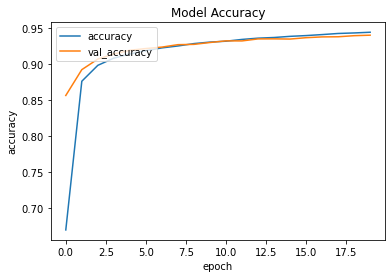

In [26]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

## Testing the trained model


In [27]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.2027 - accuracy: 0.9429


[0.2026958018541336, 0.9429000616073608]

**Accuracy**
- Train: 0.97; 
- Validation: 0.96 
- Test: 0.95

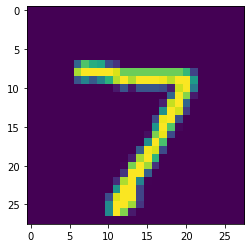

In [28]:
plt.imshow(test_images[0]);

In [29]:
print(test_labels[0])

7


In [30]:
predictions = model.predict(test_images)
print(predictions[0])

2021-12-20 12:41:18.582662: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


[1.2957324e-05 4.7132467e-09 4.6839847e-05 2.2744534e-03 4.7890234e-09
 1.4896801e-05 1.1495104e-11 9.9753976e-01 8.3034165e-06 1.0265063e-04]


In [31]:
# Returns the indices of the maximum values along an axis.
np.argmax(predictions[0])

7

In [32]:
predictions = np.argmax(predictions, axis=-1)
predictions.shape

(10000,)

In [33]:
predictions[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])

In [34]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(test_labels, predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.97      0.98      0.98      1135
           2       0.93      0.93      0.93      1032
           3       0.92      0.92      0.92      1010
           4       0.94      0.95      0.95       982
           5       0.94      0.92      0.93       892
           6       0.95      0.96      0.95       958
           7       0.95      0.94      0.94      1028
           8       0.93      0.91      0.92       974
           9       0.94      0.92      0.93      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



In [35]:
confusion_matrix(test_labels,predictions)

array([[ 965,    0,    1,    2,    0,    4,    6,    1,    1,    0],
       [   0, 1113,    5,    1,    0,    1,    3,    2,   10,    0],
       [   6,    5,  961,   17,    8,    2,    7,    7,   17,    2],
       [   2,    1,   21,  933,    0,   17,    1,   13,   15,    7],
       [   1,    1,    6,    0,  934,    0,    8,    3,    6,   23],
       [   8,    1,    2,   24,    4,  819,   12,    5,   10,    7],
       [  10,    3,    3,    1,    8,   14,  916,    1,    2,    0],
       [   0,    8,   22,    7,    1,    1,    0,  969,    3,   17],
       [   5,    5,    6,   21,   10,   13,   11,   11,  886,    6],
       [   9,    7,    1,   11,   26,    3,    1,   11,    7,  933]])

In [ ]:
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /Users/marcelo_rovai/miniforge3

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    fonttools-4.28.5           |   py39h5161555_0         1.5 MB  conda-forge
    munkres-1.1.4              |             py_0          13 KB  anaconda
    olefile-0.46               |             py_0          33 KB  anaconda
    seaborn-0.11.0             |             py_0         216 KB  anaconda
    ------------------------------------------------------------
                                           Total:         1.8 MB

The following NEW packages will be INSTALLED:

  brotli             conda-forge/osx-arm64::brotli-1.0.9-h3422bc3_6
  brotli-bin         conda-forge/osx-arm64::brotli-bin-1.0.9-h3422bc3_6
  cycler             conda-forge/noarch::cycler-0.11.0-pyhd8ed1ab_0
  fonttools          c

In [36]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(confusion_matrix(test_labels,predictions), cmap="Blues", annot=True, fmt='g');
plt.title('Confusion Matrix')
plt.xlabel("Predictions")
plt.ylabel("Real values")
plt.show()

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
model.save('MNIST_v2_model.h5')

Use [Netron](https://netron.app) to visualize the model, hyperparameters, tensor shapes, etc. Netron is a viewer for neural network, deep learning and machine learning models (See [GitHub](https://github.com/lutzroeder/netron) for instructions about instalation in your desktop). 